In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
%matplotlib inline
from functions import *

In [5]:
# load the data
df = GetData()
df.head()

,SourceFileId,TripEndTime,VehicleId,TripDistance,DriveFuel,DriveFuelEconomy,DistanceAvgLoadFactor,Drivetime,StopIdleTime,StopIdleFuel,...,AvgLoadFactor,HardBrakesPr1000miles,BrakesPr1000miles,TopGearMinusOneUsage,IdleFuelPercentage,EngineBrakePercentage,CruisePercentage,OverSpeedAPercentage,OverSpeedBPercentage,EngineFanPercentage
2,28424,8/19/2016,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
3,39301,2/5/2017,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
4,40235,5/23/2017,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
5,40616,9/13/2017,281,161448.3,28200.38,5.73,0.50,10727856,3976920,1034.50,...,0.45,0.371636,353.332925,0.056143,0.036684,0.111951,0.409945,0.013889,0.000617,0.073739
6,40694,11/6/2017,253,4572.5,774.00,5.91,0.51,286452,333288,34.25,...,0.45,0.656096,287.151449,0.303249,0.044251,0.476562,0.071635,0.255750,0.316451,1.188639


In [6]:
# get the adjusted DFE
df['dfe45'] = AdjustDFE(df)

In [7]:
df['DriveFuel45'] = df['TripDistance']/df['dfe45']

In [8]:
dfe_by_vehicle = df[['VehicleId','TripDistance','DriveFuel45','HardBrakeCount']]

In [9]:
dfe_by_vehicle2 = dfe_by_vehicle.groupby('VehicleId').sum()

In [10]:
dfe_by_vehicle2['dfeTotal'] = dfe_by_vehicle2['TripDistance']/dfe_by_vehicle2['DriveFuel45']
dfe_by_vehicle2['HardBrakesTotal'] = 1000*dfe_by_vehicle2['HardBrakeCount']/dfe_by_vehicle2['TripDistance']

In [11]:
x = dfe_by_vehicle2['dfeTotal']
y = dfe_by_vehicle2['HardBrakesTotal']

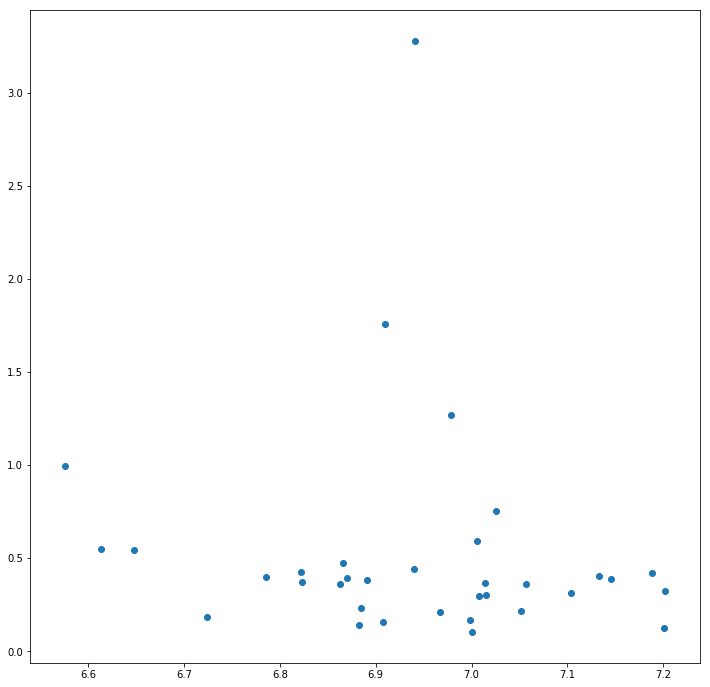

In [14]:
plt.figure(figsize = (12,12))
plt.scatter(x,y)

In [17]:
#Remove outliers
dfe_by_vehicle2 = dfe_by_vehicle2[dfe_by_vehicle2['HardBrakesTotal'] < 2]


In [18]:
x = dfe_by_vehicle2['dfeTotal']
y = dfe_by_vehicle2['HardBrakesTotal']

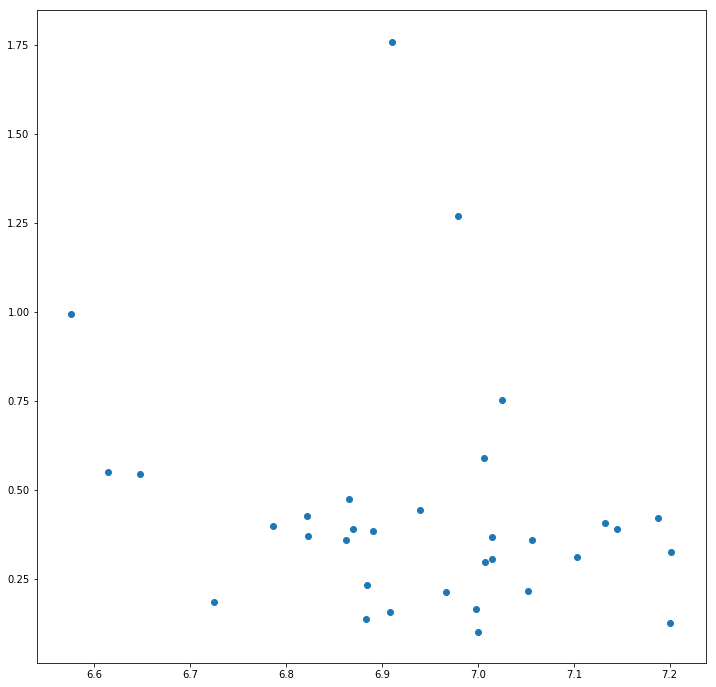

In [19]:
plt.figure(figsize = (12,12))
plt.scatter(x,y)

In [21]:
x.reshape(-1,1)

/home/kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[ 7.00607407],
       [ 6.94000419],
       [ 7.02550947],
       [ 6.99806478],
       [ 6.7242386 ],
       [ 6.64762113],
       [ 6.88458612],
       [ 6.82220637],
       [ 7.01417288],
       [ 7.20184555],
       [ 6.86245933],
       [ 7.01495456],
       [ 6.86982095],
       [ 7.05186163],
       [ 7.10322678],
       [ 7.20033804],
       [ 6.90777982],
       [ 7.05643259],
       [ 7.18805865],
       [ 7.14502848],
       [ 7.00785967],
       [ 6.96675175],
       [ 6.89079249],
       [ 7.1328013 ],
       [ 6.82284935],
       [ 7.0001409 ],
       [ 6.86568751],
       [ 6.88283519],
       [ 6.57584683],
       [ 6.78582229],
       [ 6.61383901],
       [ 6.97877772],
       [ 6.91012502]])

In [23]:
lm = LinearRegression()
lm.fit(x.reshape(-1,1),y)

/home/kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lm.coef_

array([-0.46193946])

In [25]:
lm.intercept_

3.6441205648702559